In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datathons/df_final_3.csv')

In [4]:
df_mirante = df[df['estacao']=='A715'][df['ano']<2020]
df_mirante

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,estacao,cidade,datetime,distribuidora,carga,temp_mean,ano,mes,dia,hora,...,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23,cluster_0,cluster_1,cluster_2,cluster_3
9,A715,São Miguel Arcanjo,2018-01-01 00:00:00,CPFL SANTA CRUZ,245.990005,20.333333,2018,1,1,0,...,0,0,0,0,0,0,1,0,0,0
49,A715,São Miguel Arcanjo,2018-01-01 01:00:00,CPFL SANTA CRUZ,237.589996,20.100000,2018,1,1,1,...,0,0,0,0,0,0,1,0,0,0
89,A715,São Miguel Arcanjo,2018-01-01 02:00:00,CPFL SANTA CRUZ,225.550003,20.033333,2018,1,1,2,...,0,0,0,0,0,0,1,0,0,0
129,A715,São Miguel Arcanjo,2018-01-01 03:00:00,CPFL SANTA CRUZ,215.089996,20.033333,2018,1,1,3,...,0,0,0,0,0,0,1,0,0,0
169,A715,São Miguel Arcanjo,2018-01-01 04:00:00,CPFL SANTA CRUZ,208.300003,20.200000,2018,1,1,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719594,A715,São Miguel Arcanjo,2019-12-31 22:00:00,CPFL SANTA CRUZ,372.704010,22.166667,2019,12,31,22,...,0,0,0,0,1,0,1,0,0,0
719595,A715,São Miguel Arcanjo,2019-12-31 22:00:00,CPFL SANTA CRUZ,372.704010,22.166667,2019,12,31,22,...,0,0,0,0,1,0,1,0,0,0
719719,A715,São Miguel Arcanjo,2019-12-31 23:00:00,CPFL SANTA CRUZ,350.842987,21.433333,2019,12,31,23,...,0,0,0,0,0,1,1,0,0,0
719720,A715,São Miguel Arcanjo,2019-12-31 23:00:00,CPFL SANTA CRUZ,350.842987,21.433333,2019,12,31,23,...,0,0,0,0,0,1,1,0,0,0


In [5]:
df_test = df_mirante[df_mirante['ano']==2019][df_mirante['mes']==12]
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,estacao,cidade,datetime,distribuidora,carga,temp_mean,ano,mes,dia,hora,...,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23,cluster_0,cluster_1,cluster_2,cluster_3
688327,A715,São Miguel Arcanjo,2019-12-01 00:00:00,CPFL SANTA CRUZ,316.299988,20.066667,2019,12,1,0,...,0,0,0,0,0,0,1,0,0,0
688369,A715,São Miguel Arcanjo,2019-12-01 01:00:00,CPFL SANTA CRUZ,297.238007,20.433333,2019,12,1,1,...,0,0,0,0,0,0,1,0,0,0
688411,A715,São Miguel Arcanjo,2019-12-01 02:00:00,CPFL SANTA CRUZ,283.122009,20.500000,2019,12,1,2,...,0,0,0,0,0,0,1,0,0,0
688453,A715,São Miguel Arcanjo,2019-12-01 03:00:00,CPFL SANTA CRUZ,270.407013,19.833333,2019,12,1,3,...,0,0,0,0,0,0,1,0,0,0
688495,A715,São Miguel Arcanjo,2019-12-01 04:00:00,CPFL SANTA CRUZ,264.225006,19.166667,2019,12,1,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719594,A715,São Miguel Arcanjo,2019-12-31 22:00:00,CPFL SANTA CRUZ,372.704010,22.166667,2019,12,31,22,...,0,0,0,0,1,0,1,0,0,0
719595,A715,São Miguel Arcanjo,2019-12-31 22:00:00,CPFL SANTA CRUZ,372.704010,22.166667,2019,12,31,22,...,0,0,0,0,1,0,1,0,0,0
719719,A715,São Miguel Arcanjo,2019-12-31 23:00:00,CPFL SANTA CRUZ,350.842987,21.433333,2019,12,31,23,...,0,0,0,0,0,1,1,0,0,0
719720,A715,São Miguel Arcanjo,2019-12-31 23:00:00,CPFL SANTA CRUZ,350.842987,21.433333,2019,12,31,23,...,0,0,0,0,0,1,1,0,0,0


In [6]:
df_test.shape

(750, 93)

In [7]:
df_mirante.shape

(17527, 93)

In [8]:
df_train = df_mirante[:-df_test.shape[0]]
df_train

,estacao,cidade,datetime,distribuidora,carga,temp_mean,ano,mes,dia,hora,...,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23,cluster_0,cluster_1,cluster_2,cluster_3
9,A715,São Miguel Arcanjo,2018-01-01 00:00:00,CPFL SANTA CRUZ,245.990005,20.333333,2018,1,1,0,...,0,0,0,0,0,0,1,0,0,0
49,A715,São Miguel Arcanjo,2018-01-01 01:00:00,CPFL SANTA CRUZ,237.589996,20.100000,2018,1,1,1,...,0,0,0,0,0,0,1,0,0,0
89,A715,São Miguel Arcanjo,2018-01-01 02:00:00,CPFL SANTA CRUZ,225.550003,20.033333,2018,1,1,2,...,0,0,0,0,0,0,1,0,0,0
129,A715,São Miguel Arcanjo,2018-01-01 03:00:00,CPFL SANTA CRUZ,215.089996,20.033333,2018,1,1,3,...,0,0,0,0,0,0,1,0,0,0
169,A715,São Miguel Arcanjo,2018-01-01 04:00:00,CPFL SANTA CRUZ,208.300003,20.200000,2018,1,1,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688117,A715,São Miguel Arcanjo,2019-11-30 19:00:00,CPFL SANTA CRUZ,447.311005,22.933333,2019,11,30,19,...,0,1,0,0,0,0,1,0,0,0
688159,A715,São Miguel Arcanjo,2019-11-30 20:00:00,CPFL SANTA CRUZ,423.584992,21.400000,2019,11,30,20,...,0,0,1,0,0,0,1,0,0,0
688201,A715,São Miguel Arcanjo,2019-11-30 21:00:00,CPFL SANTA CRUZ,397.556000,20.900000,2019,11,30,21,...,0,0,0,1,0,0,1,0,0,0
688243,A715,São Miguel Arcanjo,2019-11-30 22:00:00,CPFL SANTA CRUZ,360.454010,20.600000,2019,11,30,22,...,0,0,0,0,1,0,1,0,0,0


In [9]:
# T_train = df_train['temp_mean'].reset_index().drop('index', axis=1)
C_train = df_train['carga'].values.reshape(-1,1)
# T_test = df_test['temp_mean'].reset_index().drop('index', axis=1)
C_test = df_test['carga'].values.reshape(-1,1)

In [10]:
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
# T_train_mm = scaler.fit_transform(T_train)
C_train_mm = scaler_train.fit_transform(C_train)
# T_test_mm  = scaler.fit_transform(T_test)
C_test_mm  = scaler_test.fit_transform(C_test)

In [12]:
def database(dataset, step=1):
  X, Y = [], []
  for i in range(0, len(dataset) - step):
    X.append(dataset[i:(i+step), 0])
    Y.append(dataset[i+step, 0])
  return np.array(X), np.array(Y)

In [13]:
step = 6

In [14]:
X_train, Y_train = database(C_train_mm, step)
X_test, Y_test = database(C_test_mm, step)

In [15]:
X_train.shape

(16771, 6)

In [16]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,0.150498,0.130297,0.101342,0.076187,0.059858,0.055841
1,0.130297,0.101342,0.076187,0.059858,0.055841,0.033885
2,0.101342,0.076187,0.059858,0.055841,0.033885,0.000000
3,0.076187,0.059858,0.055841,0.033885,0.000000,0.023424
4,0.059858,0.055841,0.033885,0.000000,0.023424,0.063705
...,...,...,...,...,...,...
16766,0.511067,0.491378,0.512849,0.520884,0.520822,0.548230
16767,0.491378,0.512849,0.520884,0.520822,0.548230,0.634652
16768,0.512849,0.520884,0.520822,0.548230,0.634652,0.577594
16769,0.520884,0.520822,0.548230,0.634652,0.577594,0.514997


In [17]:
model = Sequential()
model.add(LSTM(step, input_shape=(None, 1), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6)                 192       
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_data=(X_test, Y_test))

Epoch 1/10
1678/1678 [==============================] - 10s 5ms/step - loss: 0.0169 - val_loss: 0.0155
Epoch 2/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0107 - val_loss: 0.0084
Epoch 3/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0085 - val_loss: 0.0069
Epoch 4/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0076 - val_loss: 0.0058
Epoch 5/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0074 - val_loss: 0.0052
Epoch 6/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 7/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0072 - val_loss: 0.0048
Epoch 8/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0074 - val_loss: 0.0051
Epoch 9/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 10/10
1678/1678 [==============================] - 8s 5ms/step - loss: 0.00

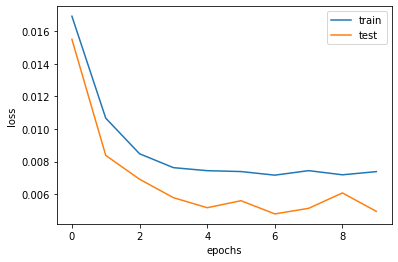

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [20]:
Y_hat = model.predict(X_test)
Y_test = Y_test.reshape(-1, 1)

In [21]:
Y_test_inverse = scaler_test.inverse_transform(Y_test)
Y_hat_inverse = scaler_test.inverse_transform(Y_hat)

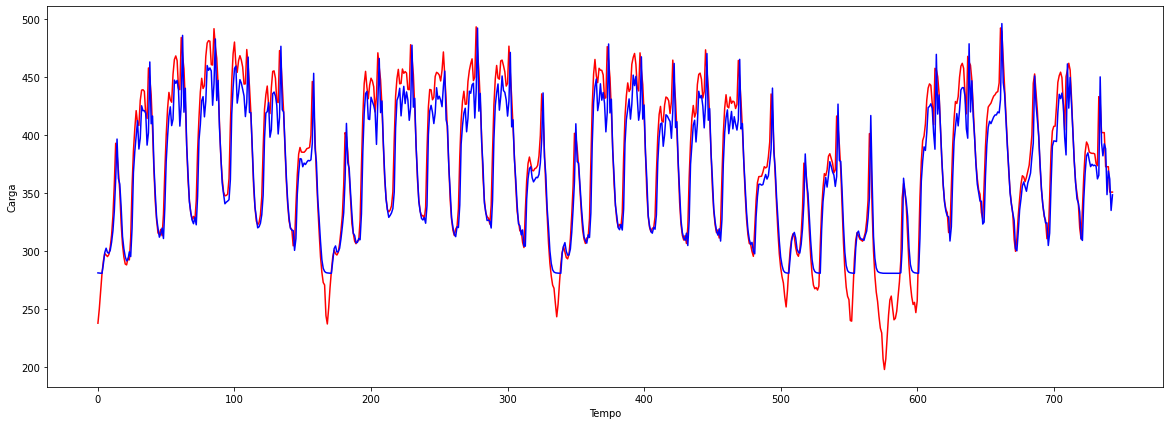

In [22]:
plt.figure(figsize=(20,7))
plt.plot(Y_test_inverse, label='Carga Real', color='r')
plt.plot(Y_hat_inverse, label='Carga Prevista', color='b')
plt.xlabel('Tempo')
plt.ylabel('Carga')
plt.show()